In [ ]:
#CoCa-Cola Sentimantal Analysis by live feed by Twitter 
#Sentimental Analysis 

In [1]:
import pandas as pd 
from nltk.corpus import stopwords
from textblob import TextBlob
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train =  pd.read_csv("D:\\rats.csv",encoding='ISO-8859-1',dtype=str)
rat = []
rats = []
wordcloud = []

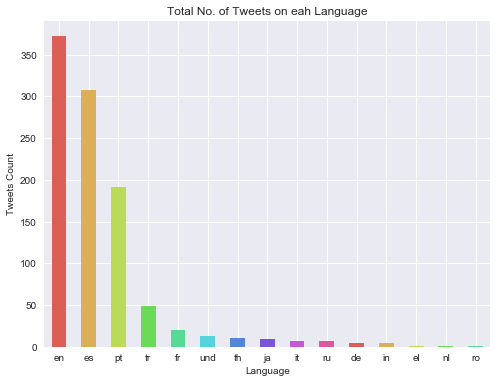

In [5]:
colors=sns.color_palette("hls", 10) 
pd.Series(train["Language"]).value_counts().plot(kind = "bar",
                        color=colors,figsize=(8,6),fontsize=10,rot = 0, title = "Total No. of Tweets on eah Language")
plt.xlabel('Language', fontsize=10)
plt.ylabel('Tweets Count', fontsize=10)
plt.show()

In [7]:
reader = train["Text"]
for lines in reader:
    toke = TextBlob(lines)
    filtered_sentences = toke.sentences
#    print(filtered_sentences)
    filtered_sentence = [w for w in filtered_sentences if not w in stopwords.words('english') and not w.startswith('@') and w != 'RT']
    for sentence in filtered_sentence:
        k = toke.polarity
        r = toke.subjectivity
        if k < -0.25 and r > 0.5:
            value = 'negetive'
            rat.append(value)
        elif k > 0.25 and r > 0.5:
            value = 'positive'
            rat.append(value)
        else:
            value = 'neutral'
            rat.append(value)
            
Dia_test  = pd.DataFrame(rat)
Dia_test.columns = ['Sentiment']
train['Sentiment'] =  Dia_test        


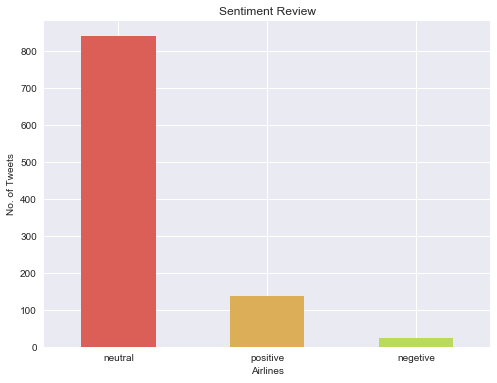

In [8]:
colors=sns.color_palette("hls", 10) 
pd.Series(train["Sentiment"]).value_counts().plot(kind = "bar",
                        color=colors,figsize=(8,6),fontsize=10,rot = 0, title = "Sentiment Review")
plt.xlabel('Airlines', fontsize=10)
plt.ylabel('No. of Tweets', fontsize=10)
plt.show()

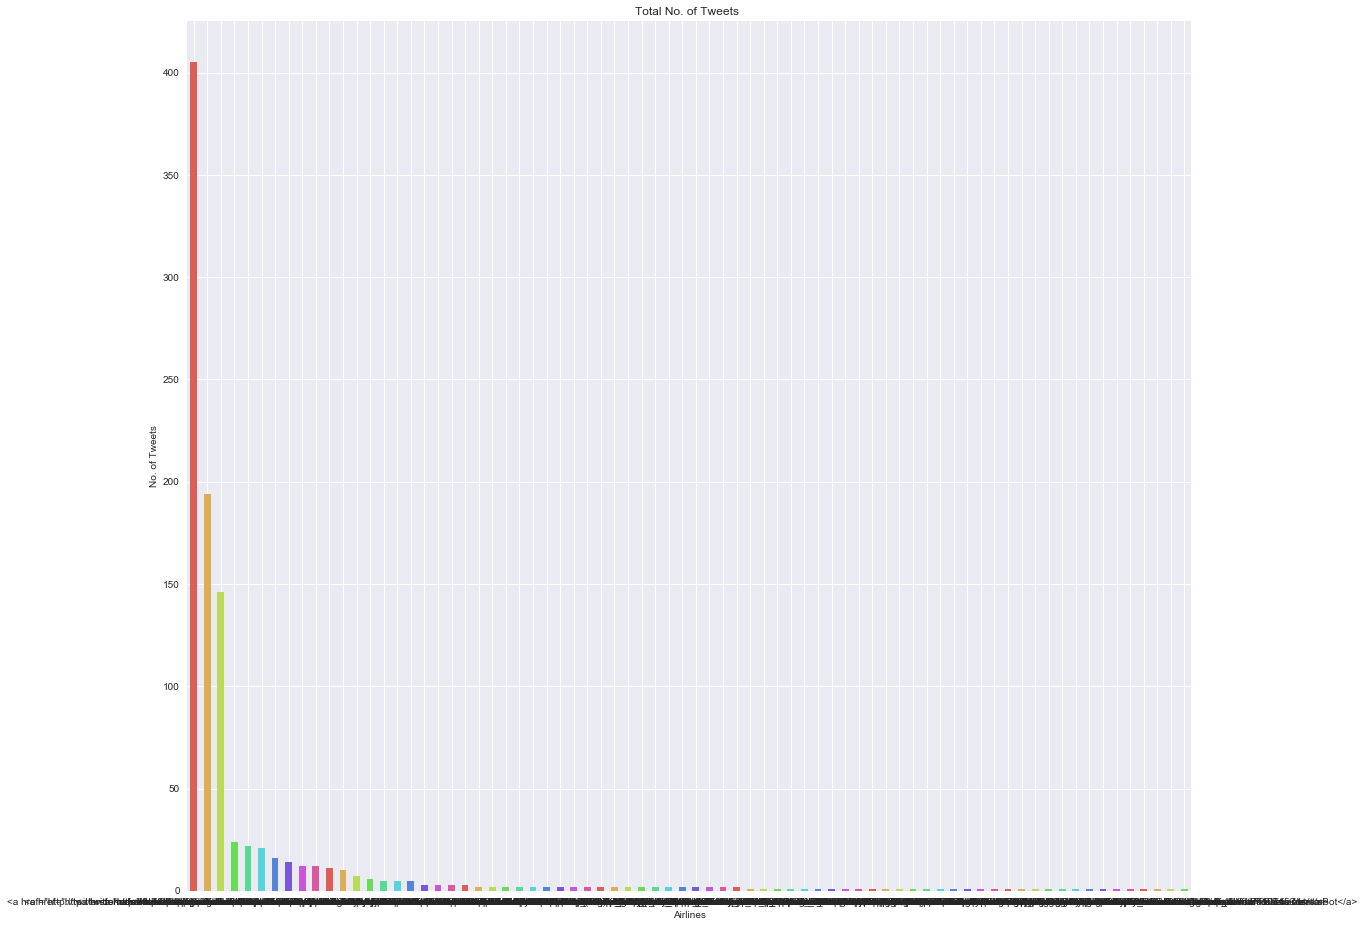

In [11]:
colors=sns.color_palette("hls", 10) 
pd.Series(train["Source"]).value_counts().plot(kind = "bar",
                        color=colors,figsize=(18,16),fontsize=10,rot = 0, title = "Total No. of Tweets ")
plt.xlabel('Airlines', fontsize=10)
plt.ylabel('No. of Tweets', fontsize=10)
plt.show()

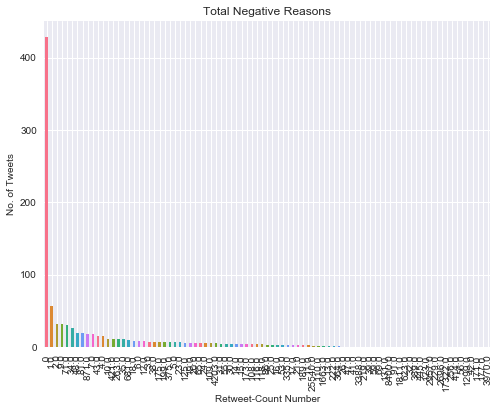

In [12]:
color=sns.color_palette("husl", 10)
pd.Series(train["Retweet-Count"]).value_counts().plot(kind = "bar",
                        color=color,figsize=(8,6),title = "Total Retweet-Count ")
plt.xlabel('Retweet-Count Number', fontsize=10)
plt.ylabel('No. of Tweets', fontsize=10)
plt.show()

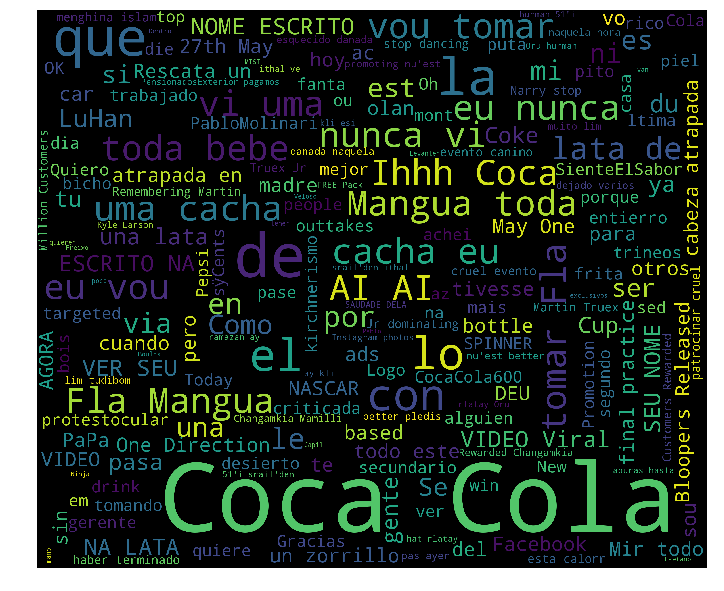

In [14]:
df=train[train['Sentiment']=='positive']
words = ' '.join(df['Text'])
cleaned_word = " ".join([word for word in words.split()  if 'http' not in word and not word.startswith('@') and word != 'RT'])     
     
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='black',width=3000, height=2500).generate(cleaned_word)

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

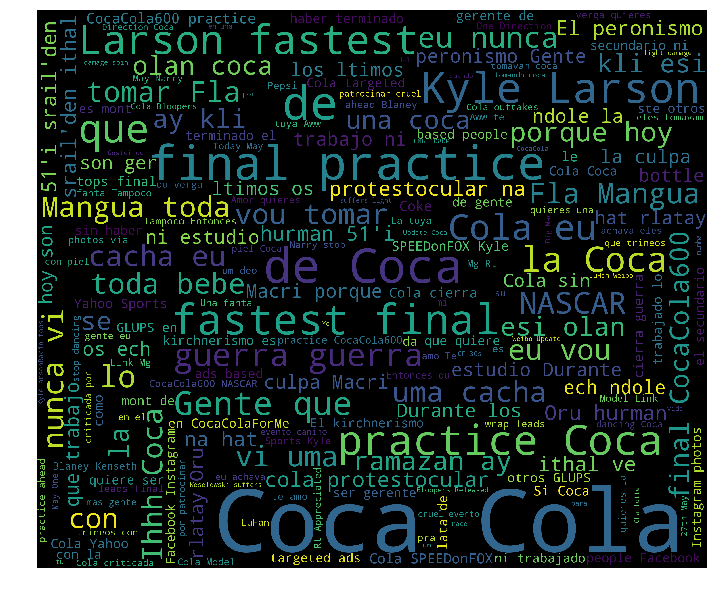

In [17]:
df=train[train['Sentiment']=='neutral']
words = ' '.join(df['Text'])
cleaned_word = " ".join([word for word in words.split()  if 'http' not in word and not word.startswith('@') and word != 'RT'])     
     
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='black',width=3000, height=2500).generate(cleaned_word)

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()